# SMS Spam Detection

The aim of the project is to predict whether an SMS message is spam or not. 
The main area of the project is natural language processing based on various machine learning and deep learning techniques, which are used to model and build algorithms that will indicate the best prediction result with the highest probability

### Main stages of the project:

- data preparation
- data representation
- building algorithms and choosing the best one which with the highest probability will indicate whether an SMS message is spam or not
- making prediction

## DATA PREPARATION

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import re
import spacy
%matplotlib inline

### Reading and Exploring Dataset

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


##### dropping "unnamed" columns and rename v1 and v2 to "label" and "message"

In [3]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns= {'v1':'label',
                            'v2':'message'})
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


##### reading basic data information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


- two columns: 'label', 'message'
- no empty values
- 5572 values in each column
- variables of object type

In [5]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

* 86.59% of values are ham of which 93.60% are unique
* the most frequent message in ham label has appeared 30 times
* 13.41% of values are spam of which 87.42% are unique
* the most frequent message in spam label has appeared 4 times

##### representation of the relationship between 'ham' and 'spam' values

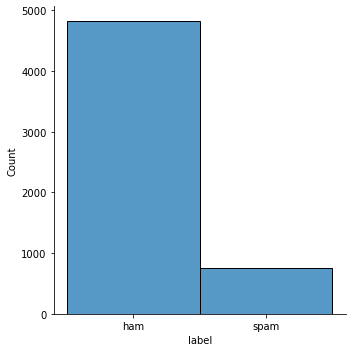

In [7]:
sns.displot(data=data, x='label')

##### creation of a new column to detect the length of text messages

In [8]:
data['message_length'] = data['message'].apply(len)
data.head(10)

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


##### creation of  a new column  'word_count' showing how many words are each in the message

In [9]:
def count_word (message):
    message_words = message.split(' ')
    message_words = len(message_words)
    return message_words

In [10]:
print(count_word('how many words there is in this short message'))

9


In [11]:
data['word_count'] = data['message'].apply(count_word)
data.head(10)

,label,message,message_length,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,32
6,ham,Even my brother is not like to speak with me. ...,77,16
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,26
8,spam,WINNER!! As a valued network customer you have...,158,26
9,spam,Had your mobile 11 months or more? U R entitle...,154,29


##### data visualization

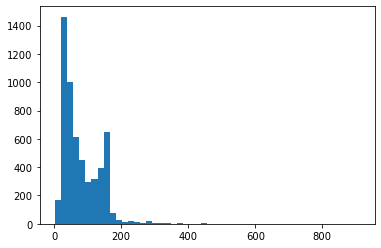

In [12]:
plt.hist(data['message_length'], bins=50)
plt.show()

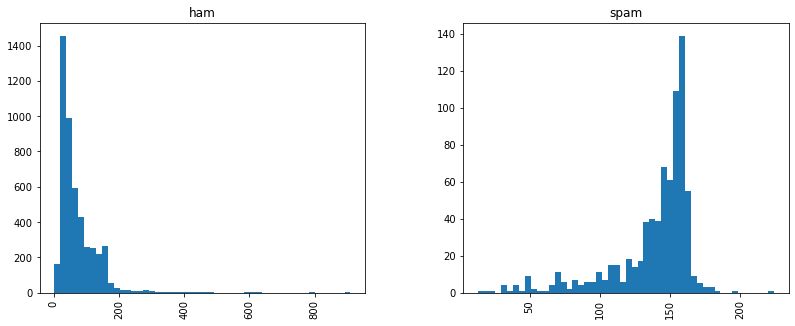

In [13]:
data.hist(column='message_length', by='label', bins=50, figsize=(13,5))
plt.show()

In [14]:
hams = data[data['label'] == 'ham'].iloc[:,1]
hams[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

In [15]:
spams = data[data['label'] == 'spam'].iloc[:,1]
spams[:5]

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

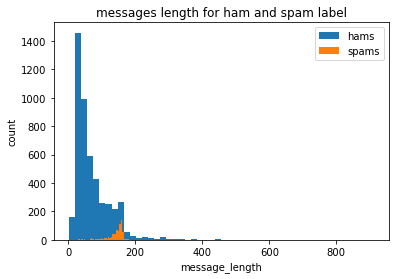

In [21]:
plt.hist(hams.apply(lambda mess: len(mess)), bins=50, label='hams')
plt.hist(spams.apply(lambda mess: len(mess)), bins=50, label='spams')
plt.xlabel('message_length')
plt.ylabel('count')
plt.title('messages length for ham and spam label')
plt.legend()
plt.show()

In [20]:
data['message_length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: message_length, dtype: float64

The graph above shows the relationship between the length of spam and ham messages. Ham messages are shorter than spam messages. There are also significantly more ham messages

the longest message is 910 characters

In [18]:
data[data['message_length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

**checking if message length is a distinguishing feature between ham and spam**

The main issue with text data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number

## DATA REPRESENTATION

In [22]:
messages = data['message']
messages

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

##### converting all strings to their lower case form

In [23]:
lower_messages = [word.lower() for word in messages]

lower_messages[:10]

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had y

##### removing all punctuations from messages

In [24]:
import string

string.punctuation

alfanum_messages = []
for mess in lower_messages:
    alfanum_messages.append(mess.translate(str.maketrans("","", string.punctuation)))

alfanum_messages[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [25]:
alfanum_messages[1]

'ok lar joking wif u oni'

##### removing stop words from messages

In [26]:
from nltk.corpus import stopwords

In [27]:
st = stopwords.words('english')
st[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [28]:
clean_messages = [word for word in alfanum_messages if word not in st]
clean_messages[:10]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å£150 to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only',
 'had your mobile 11 months or more u r entitled to update

In [26]:
clean_messages[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

#### tokenization

In [31]:
words = [[words for words in mess.split()] for mess in clean_messages]
print(words[:20])

[['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s'], ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'], ['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darling', 'its', 'been', '3', 'weeks', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£150', 'to', 'rcv'], ['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent'], ['as', 'p

In [32]:
words_len = [[len(word) for word in mess.split()] for mess in clean_messages]
print((words_len[:20]))

[[2, 5, 6, 5, 5, 9, 4, 2, 5, 1, 5, 5, 2, 1, 6, 4, 5, 3, 5, 3], [2, 3, 6, 3, 1, 3], [4, 5, 2, 1, 1, 4, 4, 2, 3, 2, 3, 5, 4, 4, 3, 4, 4, 2, 2, 5, 2, 7, 5, 11, 3, 7, 5, 18], [1, 3, 3, 2, 5, 3, 1, 1, 7, 4, 3], [3, 1, 4, 5, 2, 4, 2, 3, 2, 5, 6, 4, 6], [7, 3, 5, 7, 3, 4, 1, 5, 3, 3, 2, 4, 4, 2, 4, 4, 3, 3, 2, 3, 2, 5, 2, 2, 3, 3, 4, 2, 4, 5, 2, 3], [4, 2, 7, 2, 3, 4, 2, 5, 4, 2, 4, 5, 2, 4, 4, 6], [2, 3, 4, 7, 5, 5, 3, 15, 7, 6, 3, 4, 3, 2, 4, 10, 3, 3, 7, 5, 1, 2, 4, 4, 7, 10], [6, 2, 1, 6, 7, 8, 3, 4, 4, 8, 2, 8, 5, 5, 6, 2, 5, 4, 11, 5, 4, 5, 5, 2, 5, 4], [3, 4, 6, 2, 6, 2, 4, 1, 1, 8, 2, 6, 2, 3, 6, 6, 7, 4, 6, 3, 4, 4, 3, 6, 6, 2, 4, 2, 11], [2, 5, 2, 4, 4, 3, 1, 4, 4, 2, 4, 5, 4, 5, 7, 7, 1, 3, 5, 6, 5], [3, 7, 2, 3, 4, 4, 3, 2, 5, 6, 3, 5, 3, 4, 2, 5, 4, 7, 5, 2, 7, 5, 5, 2, 1, 4], [6, 3, 4, 3, 1, 1, 4, 4, 10, 2, 3, 8, 5, 7, 3, 3, 4, 5, 2, 2, 5, 2, 10, 6, 5, 15], [3, 4, 9, 3, 3, 5, 5, 2, 5, 3, 3, 4, 8, 1, 7, 1, 4, 4, 4, 4, 3, 7, 3, 4, 6, 2, 7, 3, 4, 4, 9, 3, 1, 8, 2, 3, 5], [1, 4, 1, 

##### count frequencies

In [35]:
from collections import Counter

frequency_word = [Counter(word) for word in words]
frequency_word[:2] # example for two messages

[Counter({'go': 1,
          'until': 1,
          'jurong': 1,
          'point': 1,
          'crazy': 1,
          'available': 1,
          'only': 1,
          'in': 1,
          'bugis': 1,
          'n': 1,
          'great': 1,
          'world': 1,
          'la': 1,
          'e': 1,
          'buffet': 1,
          'cine': 1,
          'there': 1,
          'got': 1,
          'amore': 1,
          'wat': 1}),
 Counter({'ok': 1, 'lar': 1, 'joking': 1, 'wif': 1, 'u': 1, 'oni': 1})]

In [36]:
print(clean_messages[0])

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


In [37]:
print(words[0])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


##### steaming

In [39]:
words[:2] # words in dwo first messages

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]

In [46]:
# flatting the list - words for all messages in one list
flat_words = []
for char in words:
    flat_words.extend(char)
print(flat_words[:200])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s', 'u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say', 'nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darling', 'its', 'been', '3', 'weeks', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£150', 'to', 'rcv', 'even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent', 'as', 'per', 'your', 'r

#### transformation and representation of words by means of stemming and lemmanize techniques

In [48]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [52]:
print([stemmer.stem(w) for w in flat_words][:200])

['go', 'until', 'jurong', 'point', 'crazi', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'free', 'entri', 'in', '2', 'a', 'wkli', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receiv', 'entri', 'questionstd', 'txt', 'ratetc', 'appli', '08452810075over18', 'u', 'dun', 'say', 'so', 'earli', 'hor', 'u', 'c', 'alreadi', 'then', 'say', 'nah', 'i', 'dont', 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darl', 'it', 'been', '3', 'week', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'to', 'send', 'å£150', 'to', 'rcv', 'even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aid', 'patent', 'as', 'per', 'your', 'request', 'mell', 'mel

##### lemmatization

In [53]:
from nltk.stem import WordNetLemmatizer

In [54]:
lemmatizer = WordNetLemmatizer()

In [55]:
print([lemmatizer.lemmatize(w) for w in flat_words][:200])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s', 'u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say', 'nah', 'i', 'dont', 'think', 'he', 'go', 'to', 'usf', 'he', 'life', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darling', 'it', 'been', '3', 'week', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£150', 'to', 'rcv', 'even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aid', 'patent', 'a', 'per', 'your', 'request'

The difference between lemmatization and stemming is that lemmatization takes into account the context and transforms the word to its meaningful base form, whereas stemming only removes the last few characters, which often leads to wrong meanings and spelling errors

### Part Of Speach

It is the process of converting a sentence into forms - a list of words, a list of tuples (where each tuple has a form (word, tag)). The tag in the case of a word is a part-of-speech tag and indicates whether the word is a noun, adjective, verb, etc.

In [60]:
from nltk import pos_tag

In [61]:
pos_tag_words = pos_tag(flat_words)
print(pos_tag_words[:200])

[('go', 'VB'), ('until', 'IN'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('only', 'RB'), ('in', 'IN'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'VBP'), ('buffet', 'JJ'), ('cine', 'NN'), ('there', 'EX'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'JJ'), ('ok', 'JJ'), ('lar', 'JJ'), ('joking', 'NN'), ('wif', 'NN'), ('u', 'JJ'), ('oni', 'RB'), ('free', 'JJ'), ('entry', 'NN'), ('in', 'IN'), ('2', 'CD'), ('a', 'DT'), ('wkly', 'JJ'), ('comp', 'NN'), ('to', 'TO'), ('win', 'VB'), ('fa', 'JJ'), ('cup', 'JJ'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('may', 'MD'), ('2005', 'CD'), ('text', 'NN'), ('fa', 'NN'), ('to', 'TO'), ('87121', 'CD'), ('to', 'TO'), ('receive', 'VB'), ('entry', 'NN'), ('questionstd', 'NN'), ('txt', 'NN'), ('ratetcs', 'NN'), ('apply', 'VBP'), ('08452810075over18s', 'CD'), ('u', 'JJ'), ('dun', 'NNS'), ('say', 'VBP'), ('so', 'RB'), ('early', 'JJ'), ('hor', 'NN'), ('u', 'JJ'), ('c', 'NNS'), ('alrea

The following function can be used to convert POS tags from nltk format for wordnet:

In [62]:
def wordnet_pos_code(tag):
    if tag.startswith('NN'):
        return wordnet.NOUN
    elif tag.startswith('VB'):
        return wordnet.VERB
    elif tag.startswith('JJ'):
        return wordnet.ADJ
    elif tag.startswith('RB'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [63]:
from nltk.corpus import wordnet

In [64]:
word_lemmantize = [lemmatizer.lemmatize(word, pos = wordnet_pos_code(pos)) for word, pos in pos_tag_words]
print(word_lemmantize[:200])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'get', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s', 'u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say', 'nah', 'i', 'dont', 'think', 'he', 'go', 'to', 'usf', 'he', 'live', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darling', 'it', 'be', '3', 'week', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£150', 'to', 'rcv', 'even', 'my', 'brother', 'be', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aid', 'patent', 'a', 'per', 'your', 'request', 

In [65]:
print(flat_words[:200])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s', 'u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say', 'nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darling', 'its', 'been', '3', 'weeks', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£150', 'to', 'rcv', 'even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent', 'as', 'per', 'your', 'r

### Words Cloud

In [66]:
from wordcloud import WordCloud

In [67]:
word_cloud = WordCloud(width=1000, height=500, background_color='white', max_words=80)

In [86]:
counter_word_lemmantizer = Counter(word_lemmantize)
print(list(counter_word_lemmantizer.items())[:200])

[('go', 551), ('until', 27), ('jurong', 1), ('point', 33), ('crazy', 17), ('available', 16), ('only', 210), ('in', 884), ('bugis', 7), ('n', 143), ('great', 113), ('world', 36), ('la', 7), ('e', 84), ('buffet', 2), ('cine', 7), ('there', 206), ('get', 686), ('amore', 1), ('wat', 96), ('ok', 277), ('lar', 38), ('joking', 3), ('wif', 27), ('u', 1182), ('oni', 4), ('free', 275), ('entry', 26), ('2', 478), ('a', 1589), ('wkly', 14), ('comp', 11), ('to', 2240), ('win', 152), ('fa', 4), ('cup', 8), ('final', 18), ('tkts', 4), ('21st', 3), ('may', 46), ('2005', 3), ('text', 213), ('87121', 4), ('receive', 46), ('questionstd', 2), ('txt', 163), ('ratetcs', 2), ('apply', 33), ('08452810075over18s', 2), ('dun', 55), ('say', 223), ('so', 438), ('early', 40), ('hor', 2), ('c', 88), ('already', 90), ('then', 233), ('nah', 10), ('i', 2230), ('dont', 279), ('think', 195), ('he', 210), ('usf', 11), ('live', 53), ('around', 61), ('here', 117), ('though', 26), ('freemsg', 12), ('hey', 111), ('darling', 

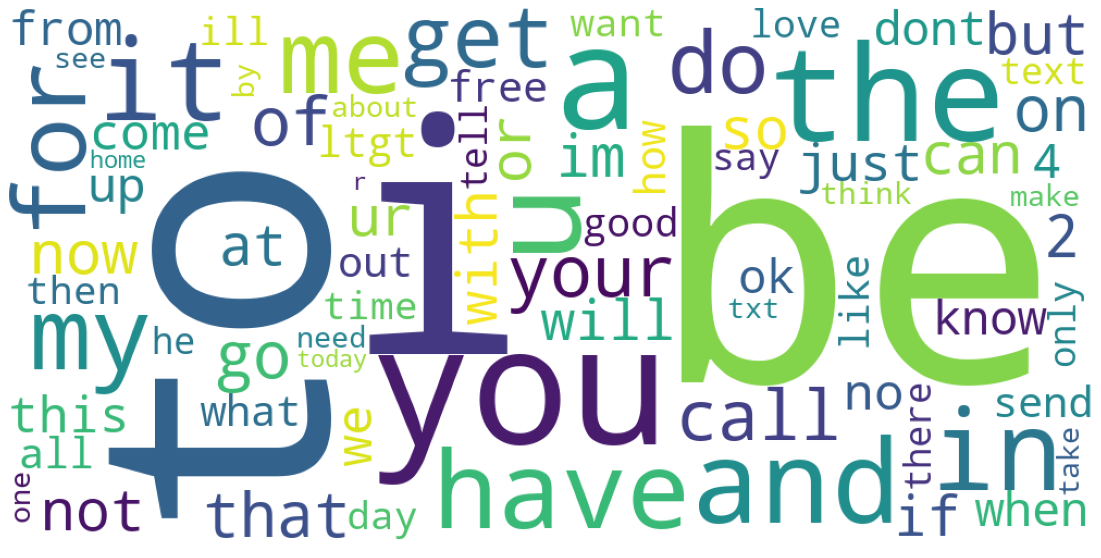

In [87]:
word_cloud.generate_from_frequencies(counter_word_lemmantizer)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

## representation text with Count Vectorizer

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

# '(?u)\\b\\w+\\b' - by default there is a regex that extracts words with at least TWO letters!

In [90]:
?CountVectorizer

In [94]:
clean_messages[:20]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å£150 to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only',
 'had your mobile 11 months or more u r entitled to update

In [95]:
print(words[:20])

[['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s'], ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'], ['nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darling', 'its', 'been', '3', 'weeks', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£150', 'to', 'rcv'], ['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent'], ['as', 'p

In [97]:
print(flat_words[:200])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s', 'u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say', 'nah', 'i', 'dont', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darling', 'its', 'been', '3', 'weeks', 'now', 'and', 'no', 'word', 'back', 'id', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£150', 'to', 'rcv', 'even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent', 'as', 'per', 'your', 'r

In [98]:
cv_m = cv.fit(clean_messages)
mess = cv_m.transform(clean_messages)
mess

<5572x9530 sparse matrix of type '<class 'numpy.int64'>'
	with 78275 stored elements in Compressed Sparse Row format>

Here we are dealing with sparse arrays - they require special handling because in normal form they would be too large

bag of words

In [110]:
print(list(cv_m.vocabulary_)[:50])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'free', 'entry', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', '87121', 'receive', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s', 'dun']


In [111]:
# number of words
len(cv_m.get_feature_names())
# len(cv_m.vocabulary_)

9530

In [112]:
len(cv_m.vocabulary_)

9530

#### ngram

In [113]:
cv_ngram = CountVectorizer(token_pattern='(?u)\\b\\w+\\b', ngram_range=(2,3))
cv_nm_m = cv_ngram.fit(clean_messages)


In [114]:
print(list(cv_nm_m.vocabulary_)[:50])

['go until', 'until jurong', 'jurong point', 'point crazy', 'crazy available', 'available only', 'only in', 'in bugis', 'bugis n', 'n great', 'great world', 'world la', 'la e', 'e buffet', 'buffet cine', 'cine there', 'there got', 'got amore', 'amore wat', 'go until jurong', 'until jurong point', 'jurong point crazy', 'point crazy available', 'crazy available only', 'available only in', 'only in bugis', 'in bugis n', 'bugis n great', 'n great world', 'great world la', 'world la e', 'la e buffet', 'e buffet cine', 'buffet cine there', 'cine there got', 'there got amore', 'got amore wat', 'ok lar', 'lar joking', 'joking wif', 'wif u', 'u oni', 'ok lar joking', 'lar joking wif', 'joking wif u', 'wif u oni', 'free entry', 'entry in', 'in 2', '2 a']


In [115]:
# number of words
len(cv_nm_m.vocabulary_)

100315

#### k most frequent words for each message

In [123]:
print(list(cv_m.get_feature_names()[800:1000]))

['7pm', '7romantic', '7shy', '7th', '7ws', '7zs', '8', '800', '8000930705', '80062', '8007', '80082', '80086', '80122300pwk', '80155', '80160', '80182', '8027', '80488', '80488biz', '80608', '8077', '80878', '80s', '81010', '81151', '81303', '81618', '816183', '82242', '82277', '82277unsub', '82324', '82468', '830', '83021', '83039', '83049', '83110', '83118', '83222', '83332please', '83338', '83355', '83370', '83383', '83435', '83600', '83738', '84', '84025', '84122', '84128', '84128custcare', '84199', '84484', '85', '850', '85023', '85069', '85222', '85233', '8552', '85555', '86021', '861', '863', '864233', '86688', '86888', '87021', '87066', '87070', '87077', '87121', '87131', '8714714', '87239', '87575', '8800', '88039', '88039skilgmetscs087147403231winawkage16å', '88066', '88088', '88222', '8830', '88600', '88800', '8883', '88877', '88877free', '88888', '89034', '89070', '89080', '89105', '89123', '89545', '89555', '89693', '89938', '8am', '8attractive', '8ball', '8hr', '8lb', '8l

examples for first message

In [124]:
mess.getrow(0).todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [125]:
# sorting values by index
mess.getrow(0).todense().argsort()

matrix([[   0, 6347, 6348, ..., 1896, 3049, 2233]])

In [138]:
print(mess.getrow(0).todense().argsort().tolist())

[[0, 6347, 6348, 6349, 6350, 6351, 6352, 6346, 6353, 6355, 6356, 6357, 6358, 6359, 6360, 6354, 6345, 6344, 6343, 6328, 6329, 6330, 6331, 6332, 6333, 6334, 6335, 6336, 6337, 6338, 6339, 6340, 6341, 6342, 6361, 6327, 6362, 6364, 6384, 6385, 6386, 6387, 6388, 6389, 6383, 6390, 6392, 6393, 6394, 6395, 6396, 6397, 6391, 6382, 6381, 6380, 6365, 6366, 6367, 6368, 6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378, 6379, 6363, 6398, 6326, 6324, 6273, 6274, 6275, 6276, 6277, 6278, 6272, 6279, 6281, 6282, 6283, 6284, 6285, 6286, 6280, 6271, 6270, 6269, 6254, 6255, 6256, 6257, 6258, 6259, 6260, 6261, 6262, 6263, 6264, 6265, 6266, 6267, 6268, 6287, 6325, 6288, 6290, 6310, 6311, 6312, 6313, 6314, 6315, 6309, 6316, 6318, 6319, 6320, 6321, 6322, 6323, 6317, 6308, 6307, 6306, 6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301, 6302, 6303, 6304, 6305, 6289, 6399, 6400, 6401, 6497, 6498, 6499, 6500, 6501, 6502, 6496, 6503, 6505, 6506, 6507, 6508, 6509, 6510, 6504, 6495, 6494, 6493,

In [98]:
k = 10

In [103]:
# the values are in ascending order so you need to reverse the order to get to the largest values
mess.getrow(0).todense().argsort().tolist()[0][::-1][:k]

[2233, 3049, 1896, 1894, 6076, 4884, 8744, 3814, 4724, 9250]

In [104]:
[cv_m.get_feature_names()[el] for el in mess.getrow(0).todense().argsort().tolist()[0][::-1][:k]]

['cine',
 'e',
 'bugis',
 'buffet',
 'only',
 'la',
 'until',
 'go',
 'jurong',
 'world']

for all the messages

In [113]:
k = 10
for i in range(len(clean_messages)):
    print([cv_m.get_feature_names()[el] for el in mess.getrow(i).todense().argsort().tolist()[0][::-1][:k]])

['cine', 'e', 'bugis', 'buffet', 'only', 'la', 'until', 'go', 'jurong', 'world']
['oni', 'ok', 'u', 'joking', 'lar', 'wif', 'ûówell', 'enough', 'entertaining', 'entertain']
['to', 'fa', 'entry', 'text', 'free', 'comp', 'win', 'questionstd', 'cup', '87121']
['u', 'say', 'c', 'dun', 'early', 'already', 'so', 'then', 'hor', 'enough']
['he', 'dont', 'nah', 'here', 'though', 'i', 'lives', 'goes', 'around', 'usf']
['to', 'back', '3', 'still', 'tb', 'up', 'been', 'it', 'word', 'now']
['me', 'like', 'with', 'aids', 'treat', 'is', 'my', 'even', 'to', 'not']
['your', 'as', 'melle', 'callertune', 'has', 'callers', 'been', 'oru', '9', 'copy']
['claim', 'to', 'you', 'have', 'receivea', 'kl341', 'reward', 'code', '09061701461', 'valued']
['update', 'to', 'mobile', 'the', 'free', 'camera', 'co', 'colour', 'your', 'on']
['home', 'soon', 'i', 'this', 'want', 'anymore', 'enough', 'about', 'gonna', 'stuff']
['to', '100', '20000', '87575', 'cash', 'tsandcs', 'hl', 'chances', 'send', '4']
['1', 'txt', 'www

## Tf-Idf transformation

This transformation measures how important individual words are in individual documents.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
tfidf_v = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')
tfidf_v_m = tfidf_v.fit_transform(clean_messages)
tfidf_v_m

<5572x9530 sparse matrix of type '<class 'numpy.float64'>'
	with 78275 stored elements in Compressed Sparse Row format>

In [115]:
tfidf_v_m.getrow(0).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [116]:
print(tfidf_v_m.getrow(0).todense().argsort().tolist()[0][::-1])

[1186, 4724, 1894, 2233, 1896, 4884, 6481, 2517, 1425, 8744, 9250, 3049, 9003, 3911, 5713, 8324, 6076, 3871, 3814, 4431, 3187, 3190, 3173, 3172, 3171, 3175, 3170, 3193, 3169, 3194, 3168, 3174, 3176, 3186, 3192, 3189, 3191, 3178, 3167, 3179, 3180, 3181, 3182, 3183, 3184, 3188, 3185, 3177, 3162, 3166, 3147, 3145, 3144, 3143, 3142, 3141, 3140, 3139, 3138, 3137, 3136, 3135, 3134, 3133, 3132, 3131, 3146, 3148, 3165, 3149, 3164, 3163, 3196, 3161, 3160, 3159, 3158, 3157, 3156, 3155, 3154, 3153, 3152, 3151, 3150, 3195, 3202, 3197, 3198, 3249, 3248, 3247, 3246, 3245, 3244, 3243, 3242, 3241, 3240, 3239, 3238, 3237, 3236, 3235, 3250, 3251, 3252, 3261, 3267, 3266, 3265, 3264, 3263, 3262, 3260, 3253, 3259, 3258, 3257, 3256, 3255, 3254, 3234, 3233, 3232, 3206, 3212, 3211, 3210, 3209, 3208, 3207, 3205, 3214, 3204, 3203, 3129, 3201, 3200, 3199, 3213, 3215, 3231, 3224, 3230, 3229, 3228, 3227, 3226, 3225, 3223, 3216, 3222, 3221, 3220, 3219, 3218, 3217, 3130, 9529, 3128, 3018, 3034, 3033, 3032, 3031, 303

In [118]:
k = 10
print(tfidf_v_m.getrow(0).todense().argsort().tolist()[0][::-1][:k])

[1186, 4724, 1894, 2233, 1896, 4884, 6481, 2517, 1425, 8744]


In [119]:
[tfidf_v.get_feature_names()[el] for el in tfidf_v_m.getrow(0).todense().argsort().tolist()[0][::-1][:k]]

['amore',
 'jurong',
 'buffet',
 'cine',
 'bugis',
 'la',
 'point',
 'crazy',
 'available',
 'until']

In [120]:
k = 10
for i in range(len(clean_messages)):
    print([tfidf_v.get_feature_names()[el] for el in tfidf_v_m.getrow(i).todense().argsort().tolist()[0][::-1][:k]])

['amore', 'jurong', 'buffet', 'cine', 'bugis', 'la', 'point', 'crazy', 'available', 'until']
['oni', 'joking', 'wif', 'lar', 'ok', 'u', 'ûówell', 'enough', 'entertaining', 'entertain']
['fa', 'entry', 'questionstd', 'ratetcs', '08452810075over18s', '21st', '2005', '87121', 'tkts', 'cup']
['say', 'hor', 'early', 'u', 'dun', 'c', 'already', 'then', 'so', 'enough']
['he', 'lives', 'nah', 'usf', 'goes', 'though', 'around', 'here', 'think', 'dont']
['chgs', 'rcv', 'tb', 'darling', 'std', 'freemsg', 'weeks', 'fun', 'xxx', 'id']
['aids', 'patent', 'like', 'treat', 'brother', 'me', 'speak', 'even', 'they', 'with']
['melle', 'callertune', 'your', 'as', 'minnaminunginte', 'vettam', 'nurungu', 'oru', 'callers', 'request']
['claim', 'receivea', 'kl341', '09061701461', 'reward', '900', 'valued', '12', 'winner', 'hours']
['update', 'mobile', '08002986030', 'free', 'co', 'entitled', '11', 'months', 'mobiles', 'colour']
['cried', 'anymore', 'enough', 'stuff', 'talk', 'gonna', 'tonight', 'soon', 'k', '

## Building machine learning algorithms using Count Vectorizer techniques 

In [1142]:
from sklearn.feature_extraction.text import CountVectorizer

In [1143]:
cv = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [1144]:
clean_messages

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å£150 to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only',
 'had your mobile 11 months or more u r entitled to update

In [1145]:
messages[1]

'Ok lar... Joking wif u oni...'

In [1146]:
clean_messages[1]

'ok lar joking wif u oni'

In [1147]:
cv.fit(clean_messages)
X = cv.transform(clean_messages)

In [1148]:
X

# sparse matrix
# there are a lot of 0's in this matrix
# the format of the matrix is sparse so that it takes up little memory space
# sparse format matrices store information about where the non-zero values are instead of storing a lot of zero values in the matrix

<5572x9530 sparse matrix of type '<class 'numpy.int64'>'
	with 78275 stored elements in Compressed Sparse Row format>

In [1149]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [1091]:
X.shape

(5572, 9530)

In [1092]:
# check how many % non-zero values are in the matrix
78275/(5572*9530)

0.001474073259416555

In [1093]:
# in the label column assign the value 1 as spam and 0 as ham
# 1 is the value we want to detect
# assign 1 or 0 to y

In [1094]:
label = data['label']
label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [1095]:
y = data.label.map({'ham':0,
                   'spam':1})
y[:10]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: label, dtype: int64

In [877]:
y.mean()
# there are only 13% of ones in the whole set

0.13406317300789664

In [878]:
y.shape

(5572,)

In [879]:
X.shape

(5572, 9530)

In [891]:
# dividing the data into training and test parts

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [892]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [893]:
# model initialisation
model = LogisticRegression()
# fitting the model to the data (model learning)
model.fit(X_train, y_train) 

LogisticRegression()

In [894]:
# predicted value y
y_pred = model.predict(X_test)

In [895]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.97847533632287

In [896]:
# assessment of model accuracy for train data
accuracy_score(y_train, model.predict(X_train))

0.9975319721785955

In [897]:
# text report showing the main classification metrics
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes.

support tells how many observations there are of a particular class

* precision

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
* recall

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
* f1-score

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

* sensitivity and precision are opposites in practice
* high sensitivity reduces precision, because we will find anything and it will not necessarily be precise
* increase sensitivity - frequent assignment of 1 will make sensitivity high
* increase precision - rarely assign 1, classify as 1 if probability is very high (you can set 91% samples in advance)
* the higher the precision, the lower the sensitivity
* you should look at the F1 measure --> look for the model that has the best F1 and precision or F1 and sensitivity
* one cannot rely on only one measure of sensitivity or precision

In [898]:
# confusion matrix - model accuracy assessment
# rows correspond to true classes
# columns correspond to predicted classes

print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[963   2]
 [ 22 128]]


**Interpretation of the confusion matrix:**
* there are 965 points in the first class (label 0). Out of these, model is successful in identifying 963 of those correctly in label 0, but 2 is marked as label 1. Index recall is 963/965 = 99.79%
* there are 150 points in the second class (label 1). Out of these, model is successful in identifying 128 of those correctly in label 1, but 22 is marked as label 0. Index recall is 128/150 = 85.33%

In [899]:
from sklearn.metrics import roc_auc_score

* FPR = % of class 0 observations classified as 1
* TPR = % of class 1 observations classified as 1
* calculate the FPR and TPR for the different classification thresholds in turn for all thresholds from the probability vector
* ROC curve - pairs of TPR and FPR points. 
* each point on the ROC line is a pair of TPR and FPR for the thresholds
* AUC - area under the ROC curve
* the better the classifier, the higher and bigger the AUC curve should be
* the area under the curve measures how good the probability is - an indicator of the quality of probabilities
* the closer the FPR is to zero and the closer the TPR is to 1, the better the classification

In [900]:
roc_auc_score(y_test, y_pred)

0.9256303972366149

##### version with Grid Search

In [901]:
from sklearn.model_selection import GridSearchCV

In [902]:
model = LogisticRegression()
# specifying the options we want to consider/examine in a dictionary
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
             'penalty': ['l2']}
# testing all options
optimizer = GridSearchCV(model, param_grid, cv=10)
# optimisation of parameters on the training set
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']})

In [903]:
# predicted value y
y_pred = optimizer.best_estimator_.predict(X_test)

In [904]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9829596412556054

The accuracy of the Linear Regression model with Grid Search is slightly better than the value of the model with the default parameters. The difference is negligible. 

In [905]:
# showing which options were evaluated in turn
optimizer.cv_results_['params']

[{'C': 0.01, 'penalty': 'l2'},
 {'C': 0.1, 'penalty': 'l2'},
 {'C': 1, 'penalty': 'l2'},
 {'C': 10, 'penalty': 'l2'},
 {'C': 100, 'penalty': 'l2'}]

In [906]:
# showing the results for each pair of variants
optimizer.cv_results_['mean_test_score']

array([0.94121076, 0.97352295, 0.98294604, 0.98429234, 0.98496549])

In [907]:
# to indicate the best set of parameters
# it only returns the parameters we optimized, not all model parameters
optimizer.best_params_

{'C': 100, 'penalty': 'l2'}

In [908]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[962   3]
 [ 16 134]]


In [909]:
roc_auc_score(y_test, y_pred)

0.945112262521589

### Decision Tree

In [910]:
from sklearn.tree import DecisionTreeClassifier

In [911]:
# model initialisation
model = DecisionTreeClassifier()
# fitting the model to the data (model learning)
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [912]:
# predicted value y
y_pred = model.predict(X_test)

In [913]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9713004484304932

In [914]:
# assessment of model accuracy for train data
accuracy_score(y_train, model.predict(X_train))

1.0

In [915]:
# text report showing the main classification metrics
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.90      0.88      0.89       150

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [916]:
# confusion matrix - model accuracy assessment
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[951  14]
 [ 18 132]]


**Interpretation of the confusion matrix:**
* there are 965 points in the first class (label 0). Out of these, model is successful in identifying 951 of those correctly in label 0, but 14 is marked as label 1. Index recall is 951/965 = 98.55%
* there are 150 points in the second class (label 1). Out of these, model is successful in identifying 132 of those correctly in label 1, but 18 is marked as label 0. Index recall is 132/150 = 86.67%

In [917]:
roc_auc_score(y_test, y_pred)

0.9327461139896372

##### version with Grid Search

In [918]:
# model initialisation
model = DecisionTreeClassifier()
# specifying the options we want to consider/examine in a dictionary
param_grid = {"min_samples_leaf": [1,10, 15, 50],
             "max_depth": [10, 15, 20, None]}
# testing all options
optimizer = GridSearchCV(model, param_grid, cv=10)
# optimisation of parameters on the training set
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [1, 10, 15, 50]})

In [919]:
# predicted value y
y_pred = optimizer.best_estimator_.predict(X_test)

In [920]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9757847533632287

In [921]:
# showing which options were evaluated in turn
optimizer.cv_results_['params']

[{'max_depth': 10, 'min_samples_leaf': 1},
 {'max_depth': 10, 'min_samples_leaf': 10},
 {'max_depth': 10, 'min_samples_leaf': 15},
 {'max_depth': 10, 'min_samples_leaf': 50},
 {'max_depth': 15, 'min_samples_leaf': 1},
 {'max_depth': 15, 'min_samples_leaf': 10},
 {'max_depth': 15, 'min_samples_leaf': 15},
 {'max_depth': 15, 'min_samples_leaf': 50},
 {'max_depth': 20, 'min_samples_leaf': 1},
 {'max_depth': 20, 'min_samples_leaf': 10},
 {'max_depth': 20, 'min_samples_leaf': 15},
 {'max_depth': 20, 'min_samples_leaf': 50},
 {'max_depth': None, 'min_samples_leaf': 1},
 {'max_depth': None, 'min_samples_leaf': 10},
 {'max_depth': None, 'min_samples_leaf': 15},
 {'max_depth': None, 'min_samples_leaf': 50}]

In [922]:
# showing the results for each pair of variants
optimizer.cv_results_['mean_test_score']

array([0.96208092, 0.94861692, 0.94772056, 0.92528241, 0.96768882,
       0.95063586, 0.9470464 , 0.92528241, 0.96791152, 0.95220839,
       0.94682169, 0.92528241, 0.96948204, 0.95086008, 0.94772056,
       0.92528241])

In [923]:
# to indicate the best set of parameters
# it only returns the parameters we optimized, not all model parameters
optimizer.best_params_

{'max_depth': None, 'min_samples_leaf': 1}

the accuracy of the model with the default parameters is higher

In [924]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.92      0.90      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[953  12]
 [ 15 135]]


In [925]:
roc_auc_score(y_test, y_pred)

0.943782383419689

### Naive Bayes classifier

In [1063]:
from sklearn.naive_bayes import MultinomialNB

In [1097]:
# model initialisation
model = MultinomialNB()
# fitting the model to the data (model learning)
model.fit(X_train, y_train)

MultinomialNB()

In [1098]:
# predicted value y
y_pred = model.predict(X_test)

In [1099]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9829596412556054

In [1100]:
# assessment of model accuracy for train data
accuracy_score(y_train, model.predict(X_train))

0.9914740857078752

In [1101]:
# text report showing the main classification metrics
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       965
           1       0.91      0.97      0.94       150

    accuracy                           0.98      1115
   macro avg       0.95      0.98      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [1102]:
# confusion matrix - model accuracy assessment
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[950  15]
 [  4 146]]


**Interpretation of the confusion matrix:**
* there are 965 points in the first class (label 0). Out of these, model is successful in identifying 950 of those correctly in label 0, but 15 is marked as label 1. Index recall is 950/965 = 98.45%
* there are 150 points in the second class (label 1). Out of these, model is successful in identifying 146 of those correctly in label 1, but 4 is marked as label 0. Index recall is 146/150 = 97.33%

In [1103]:
roc_auc_score(y_test, y_pred)

0.9788946459412781

##### version with Grid Search

In [1071]:
# model initialisation
model = MultinomialNB()
# specifying the options we want to consider/examine in a dictionary
param_grid = {'alpha': [0.5, 1, 2]}
# testing all options
optimizer = GridSearchCV(model, param_grid, cv=10)
# optimisation of parameters on the training set
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.5, 1, 2]})

In [1072]:
# predicted value y
y_pred = optimizer.best_estimator_.predict(X_test)

In [1073]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9829596412556054

In [1074]:
# showing the results for each pair of variants
optimizer.cv_results_['mean_test_score']

array([0.97711291, 0.97801129, 0.9768892 ])

In [1075]:
# to indicate the best set of parameters
# it only returns the parameters we optimized, not all model parameters
optimizer.best_params_

{'alpha': 1}

In [1076]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       965
           1       0.91      0.97      0.94       150

    accuracy                           0.98      1115
   macro avg       0.95      0.98      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[950  15]
 [  4 146]]


In [1077]:
roc_auc_score(y_test, y_pred)

0.9788946459412781

### Support Vector Machine - SVM

In [941]:
from sklearn.svm import SVC

In [942]:
# model initialisation
model = SVC()
# optimisation of parameters on the training set
model.fit(X_train, y_train)

SVC()

In [943]:
# predicted value y
y_pred = model.predict(X_test)

In [944]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9739910313901345

In [945]:
# assessment of model accuracy for test data
accuracy_score(y_train, model.predict(X_train))

0.994166479694862

In [946]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[965   0]
 [ 29 121]]


**Interpretation of the confusion matrix:**
* there are 966 points in the first class (label 0). Out of these, model is successful in identifying 965 of those correctly in label 0, and 0 is marked as label 1. Index recall is 965/965 = 100%
* there are 150 points in the second class (label 1). Out of these, model is successful in identifying 121 of those correctly in label 1, but 29 is marked as label 0. Index recall is 121/150 = 80.67%

In [947]:
roc_auc_score(y_test, y_pred)

0.9033333333333333

##### version with Grid Search

In [948]:
# model initialisation
model = SVC()
# specifying the options we want to consider/examine in a dictionary
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']} 
# testing all options
optimizer = GridSearchCV(model, param_grid, cv=10)
# optimisation of parameters on the training set
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']})

In [949]:
# predicted value y
y_pred = optimizer.best_estimator_.predict(X_test)

In [950]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9802690582959641

In [951]:
# showing which options were evaluated in turn
optimizer.cv_results_['params']

[{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'},
 {'C': 1, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 1, 'gamma': 'auto', 'kernel': 'linear'},
 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 10, 'gamma': 'auto', 'kernel': 'linear'},
 {'C': 100, 'gamma': 'scale', 'kernel': 'linear'},
 {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}]

In [952]:
# showing the results for each pair of variants
optimizer.cv_results_['mean_test_score']

array([0.98362019, 0.98362019, 0.9851897 , 0.9851897 , 0.98541392,
       0.98541392, 0.98541392, 0.98541392])

In [953]:
# to indicate the best set of parameters
# it only returns the parameters we optimized, not all model parameters
optimizer.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [954]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.88      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[961   4]
 [ 18 132]]


In [955]:
roc_auc_score(y_test, y_pred)

0.9379274611398963

### Random Forest

In [956]:
from sklearn.ensemble import RandomForestClassifier

In [957]:
# model initialisation
model = RandomForestClassifier()
# optimisation of parameters on the training set
model.fit(X_train, y_train)

RandomForestClassifier()

In [958]:
# predicted value y
y_pred = model.predict(X_test)

In [959]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9721973094170404

In [960]:
# assessment of model accuracy for train data
accuracy_score(y_train, model.predict(X_train))

1.0

In [961]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

[[965   0]
 [ 31 119]]


**Interpretation of the confusion matrix:**
* there are 965 points in the first class (label 0). Out of these, model is successful in identifying 965 of those correctly in label 0, and 0 is marked as label 1. Index recall is 965/965 = 100%
* there are 150 points in the second class (label 1). Out of these, model is successful in identifying 119 of those correctly in label 1, but 31 is marked as label 0. Index recall is 119/150 = 79.33%

In [962]:
roc_auc_score(y_test, y_pred)

0.8966666666666667

##### version with Grid Search

In [963]:
# model initialisation
model = RandomForestClassifier()
# specifying the options we want to consider/examine in a dictionary
param_grid = {'n_estimators':[50, 100, 250, 500],
             'min_samples_leaf': [10, 25, 50, 100]}
# testing all options
optimizer = GridSearchCV(model, param_grid, cv=10)
# optimisation of parameters on the training set
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [10, 25, 50, 100],
                         'n_estimators': [50, 100, 250, 500]})

In [964]:
# predicted value y
y_pred = optimizer.best_estimator_.predict(X_test)

In [965]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9022421524663677

In [966]:
# showing which options were evaluated in turn
optimizer.cv_results_['params']

[{'min_samples_leaf': 10, 'n_estimators': 50},
 {'min_samples_leaf': 10, 'n_estimators': 100},
 {'min_samples_leaf': 10, 'n_estimators': 250},
 {'min_samples_leaf': 10, 'n_estimators': 500},
 {'min_samples_leaf': 25, 'n_estimators': 50},
 {'min_samples_leaf': 25, 'n_estimators': 100},
 {'min_samples_leaf': 25, 'n_estimators': 250},
 {'min_samples_leaf': 25, 'n_estimators': 500},
 {'min_samples_leaf': 50, 'n_estimators': 50},
 {'min_samples_leaf': 50, 'n_estimators': 100},
 {'min_samples_leaf': 50, 'n_estimators': 250},
 {'min_samples_leaf': 50, 'n_estimators': 500},
 {'min_samples_leaf': 100, 'n_estimators': 50},
 {'min_samples_leaf': 100, 'n_estimators': 100},
 {'min_samples_leaf': 100, 'n_estimators': 250},
 {'min_samples_leaf': 100, 'n_estimators': 500}]

In [967]:
# showing the results for each pair of variants
optimizer.cv_results_['mean_test_score']

array([0.90060311, 0.90217967, 0.90105507, 0.90172923, 0.86605432,
       0.86605432, 0.86605432, 0.86605432, 0.86605432, 0.86605432,
       0.86605432, 0.86605432, 0.86605432, 0.86605432, 0.86605432,
       0.86605432])

In [968]:
# to indicate the best set of parameters
# it only returns the parameters we optimized, not all model parameters
optimizer.best_params_

{'min_samples_leaf': 10, 'n_estimators': 100}

In [969]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       965
           1       1.00      0.27      0.43       150

    accuracy                           0.90      1115
   macro avg       0.95      0.64      0.69      1115
weighted avg       0.91      0.90      0.88      1115

[[965   0]
 [109  41]]


In [970]:
roc_auc_score(y_test, y_pred)

0.6366666666666667

### K - Nearest neighbours

In [971]:
from sklearn.neighbors import KNeighborsClassifier

In [972]:
# model initialisation
model = KNeighborsClassifier(n_neighbors=5)
# optimisation of parameters on the training set
model.fit(X_train, y_train)

KNeighborsClassifier()

In [973]:
?KNeighborsClassifier

In [974]:
# predicted value y
y_pred = model.predict(X_test)

In [975]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [976]:
# assessment of model accuracy for test data
accuracy_score(y_test, y_pred)

0.9210762331838565

In [977]:
model.predict_proba(X_test).round(2)[:10]

# probabilities of subsequent observations
# 0 column is the probability that an observation is class 0
# first 6 observations mean that observation at 100% is 0 and 7th observation means that at 80% is 0 and 20% is 1
# the rows are consecutive observations
# so the 1st column is pi(x) which is class 1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [978]:
# assessment of model accuracy for train data
accuracy_score(y_train, model.predict(X_train))

0.9288759255104331

In [979]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       965
           1       1.00      0.41      0.58       150

    accuracy                           0.92      1115
   macro avg       0.96      0.71      0.77      1115
weighted avg       0.93      0.92      0.91      1115

[[965   0]
 [ 88  62]]


**Interpretation of the confusion matrix:**
* there are 965 points in the first class (label 0). Out of these, model is successful in identifying 966 of those correctly in label 0, and 0 is marked as label 1. Index recall is 965/965 = 100%
* there are 150 points in the second class (label 1). Out of these, model is successful in identifying 62 of those correctly in label 1, but 88 is marked as label 0. Index recall is 62/150 = 41.33%

In [980]:
roc_auc_score(y_test, y_pred)

0.7066666666666667

### XG Boost

In [981]:
from xgboost.sklearn import XGBClassifier

In [982]:
# model initialisation
model = XGBClassifier()
# optimisation of parameters on the training set
model.fit(X_train, y_train)

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [983]:
y_pred = model.predict(X_test)

In [984]:
# assessment of model accuracyfor test data
accuracy_score(y_test, y_pred)

0.9766816143497757

In [985]:
# assessment of model accuracy for train data
accuracy_score(y_train, model.predict(X_train))

0.994166479694862

In [986]:
# text report showing the main classification metrics and confusion matrix - model accuracy assessment
print(sklearn.metrics.classification_report(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[961   4]
 [ 22 128]]


**Interpretation of the confusion matrix:**
* there are 965 points in the first class (label 0). Out of these, model is successful in identifying 961 of those correctly in label 0, and 4 is marked as label 1. Index recall is 961/965 = 99.56%
* there are 150 points in the second class (label 1). Out of these, model is successful in identifying 128 of those correctly in label 1, but 22 is marked as label 0. Index recall is 128/150 = 85.33%

In [987]:
roc_auc_score(y_test, y_pred)

0.9245941278065631

##### Stepwise optimization of hyperparameters - Grid Search

In [988]:
# iterative action 
# we first optimise some of the parameters
# we choose the best variant from them
# and then we optimise the others with the ones we've already chosen

model = XGBClassifier(n_estimators=20, learning_rate=0.1)
param_grid = {"gamma": [0, 0.01, 0.1], 
              "reg_alpha": [0, 0.05, 0.1]}

optimizer = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
optimizer.fit(X_train, y_train)

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=20, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [989]:
# predicted value y
y_pred = optimizer.best_estimator_.predict(X_test)

In [990]:
# assessment of model accuracy/accuracy for test data
accuracy_score(y_test, y_pred)

0.9659192825112107

In [991]:
roc_auc_score(y_test, y_pred)

0.8930397236614854

##### Stepwise optimization of hyperparameters - Random Search

In [992]:
from sklearn.model_selection import RandomizedSearchCV
# Radnom Search is testing random combinations
# if we make enough attempts, we are likely to get good results
# if we have, for example, 5 hyperparameters and for each of them we want to test 10 combinations, it will be 10 to the power of 5, so it is better to define random ranges of these values

In [993]:
import scipy.stats as ss
# defining a grid of parameters
# define the distribution of values (from to)
# specify ss range or values one by one in list saved

model = XGBClassifier()
param_grid = {"n_estimators": [20, 30, 50], # the list draws one of these three values
              "learning_rate": ss.uniform(0.01, 0.3), # from 0.01 to 0.3
              "max_depth": ss.randint(5, 15), # from 5 to 15
              "gamma": ss.uniform(0.01, 0.5)} # from 0.01 to 0.5

optimizer = RandomizedSearchCV(model, param_grid, 
                               n_iter=50, # iteration count
                               cv=5, 
                               n_jobs=-1)
optimizer.fit(X_train, y_train)

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [994]:
# predicted value y
y_pred = optimizer.best_estimator_.predict(X_test)

In [995]:
# assessment of model accuracy/accuracy for test data
accuracy_score(y_test, y_pred)

0.9721973094170404

In [996]:
roc_auc_score(y_test, y_pred)

0.9079274611398963

### Choosing the best model by using Count Vectorizer techniques

In [998]:
values_cv = [('Logistic Regression', '0.9830', '0.9451'), ('Decision Tree', '0.9758', '0.9438'), ('Naive Bayes classifier','0.9830', '0.9790'), ('SVM', '0.9803', '0.9379'), ('Random Forest', '0.9722', '0.8967'), ('K - Narest Neighbours', '0.9211', '0.7067'), ('XG Boost', '0.9767', '0.9246')]
metrics_cv = ['Models', 'accuracy_cv', 'roc_auc score_cv']

result_cv = pd.DataFrame.from_records(values_cv, columns=metrics_cv)
result_cv

,Models,accuracy_cv,roc_auc score_cv
0,Logistic Regression,0.9830,0.9451
1,Decision Tree,0.9758,0.9438
2,Naive Bayes classifier,0.9830,0.9790
3,SVM,0.9803,0.9379
4,Random Forest,0.9722,0.8967
5,K - Narest Neighbours,0.9211,0.7067
6,XG Boost,0.9767,0.9246


The best model for text analysis using Count Vectorizer techniques is Naive Bayes classifier with accuracy 98.30% and roc_auc_score 97.90%. 

### Prediction based on a selected model using own examples

In [1116]:
# model initialisation
model = MultinomialNB()
# fitting the model to the data (model learning)
model.fit(X_train, y_train)

MultinomialNB()

In [1156]:
def get_predictions(new_txts):
    new_txts = cv.transform(new_txts)
    preds = model.predict(new_txts)
    if(preds[0] == 1):
        print("SPAM MESSAGE")
        
    else:
        print('NOT SPAM')

In [1161]:
# spam
new_txts = ['Congratulations!!! You won new iPhone! Confirm this message by click in wthis link']
get_predictions(new_txts)

SPAM MESSAGE


In [1160]:
# not spam
new_txts = ['hello, are you OK? Could you buy me some of fruits?']
get_predictions(new_txts)

NOT SPAM


As you can see above, the examples I invented for spam and ham messages were correctly classified by the chosen algorithm

## Building machine learning algorithms using Tf Idf Vectorizer 

In [1162]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1163]:
tfidf_v = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [1164]:
messages[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [1165]:
clean_messages[2]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

In [1166]:
tfidf_v.fit(clean_messages)
X = tfidf_v.transform(clean_messages)

In [1167]:
X

<5572x9530 sparse matrix of type '<class 'numpy.float64'>'
	with 78275 stored elements in Compressed Sparse Row format>

In [1168]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1169]:
X.shape

(5572, 9530)

In [1170]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [1171]:
y.shape

(5572,)

In [1172]:
from sklearn.model_selection import train_test_split

In [1173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1174]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    XGBClassifier()
]

grids = [
    {'C': [0.01, 0.1, 1, 10, 100],
     'penalty': ['l2']},
    {"min_samples_leaf": [1,10, 15, 50],
     "max_depth": [10, 15, 20, None]},
    {'alpha': [0.5, 1, 2]},
    {'C': [0.1, 1, 10, 100],  
     'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
     'gamma':['scale', 'auto'],
     'kernel': ['linear']},
    {'n_estimators':[50, 100, 250, 500],
     'min_samples_leaf': [10, 25, 50, 100]},
    {},
    {"gamma": [0, 0.01, 0.1], 
     "reg_alpha": [0, 0.05, 0.1]}
]

for model, param_grid in zip(models, grids):
    optimizer = GridSearchCV(model, param_grid, cv=10)
    optimizer.fit(X_train, y_train)
    y_pred = optimizer.best_estimator_.predict(X_test)
    print("accuracy score {}".format(accuracy_score(y_test, y_pred)))
    print("f1_score {}".format(sklearn.metrics.f1_score(y_test, y_pred)))
    print("roc_auc_score {}".format(sklearn.metrics.roc_auc_score(y_test, y_pred)))

/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

accuracy score 0.9820627802690582
f1_score 0.9259259259259259
roc_auc_score 0.9335128447190754
accuracy score 0.9668161434977578
f1_score 0.867383512544803
roc_auc_score 0.9129298260670557
accuracy score 0.9748878923766816
f1_score 0.8947368421052632
roc_auc_score 0.9116496452683372
accuracy score 0.9820627802690582
f1_score 0.9264705882352942
roc_auc_score 0.9364701338825953
accuracy score 0.9228699551569507
f1_score 0.5742574257425743
roc_auc_score 0.7013888888888888
accuracy score 0.9623318385650225
f1_score 0.8306451612903227
roc_auc_score 0.8571239558301865
[09:28:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/joanna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:28:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:28:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:28:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

### Choosing the best model by using Tf Idf Vectorizer techniques

In [1175]:
values_tfidf = [('Logistic Regression', '0.9821', '0.9334'), ('Decision Tree', '0.9668', '0.9130'), ('Naive Bayes classifier','0.9749', '0.9116'), ('SVM', '0.9821', '0.9365'), ('Random Forest', '0.9229', ' 0.7014'), ('K - Narest Neighbours', '0.9623', '0.8571'), ('XG Boost', '0.9785', '0.9374')]
metrics_tfidf = ['Models', 'accuracy_tfidf', 'roc_auc score_tfidf']

result_tfidf = pd.DataFrame.from_records(values_tfidf, columns=metrics_tfidf)
result_tfidf

,Models,accuracy_tfidf,roc_auc score_tfidf
0,Logistic Regression,0.9821,0.9334
1,Decision Tree,0.9668,0.9130
2,Naive Bayes classifier,0.9749,0.9116
3,SVM,0.9821,0.9365
4,Random Forest,0.9229,0.7014
5,K - Narest Neighbours,0.9623,0.8571
6,XG Boost,0.9785,0.9374


The best model for text analysis using Count Vectorizer techniques is SVM with accuracy 98.21% and roc_auc_score 93.65%. 

In [1176]:
# model initialisation
model = SVC()
# fitting the model to the data (model learning)
model.fit(X_train, y_train)

SVC()

In [1179]:
def get_predictions(new_txts):
    new_txts = tfidf_v.transform(new_txts)
    preds = model.predict(new_txts)
    if(preds[0] == 1):
        print("SPAM MESSAGE")
        
    else:
        print('NOT SPAM')

In [1180]:
# spam
new_txts = ['Congratulations!!! You won new iPhone! Confirm this message by click in wthis link']
get_predictions(new_txts)

SPAM MESSAGE


In [1181]:
# not spam
new_txts = ['hello, are you OK? Could you buy me some of fruits?']
get_predictions(new_txts)

NOT SPAM


As you can see above, the examples I invented for spam and ham messages were correctly classified by the chosen algorithm

## Classifiying by natural language processing using deep learning

In [659]:
# importing libaries required

from keras.preprocessing.text import Tokenizer # text tokenization utility class
from tensorflow.keras.preprocessing.sequence import pad_sequences # pads sequences to the same length
from keras.layers import Embedding, LSTM, Dropout, Dense 
from keras.models import Sequential # a Sequential model
from keras.utils import to_categorical # converts a class vector (integers) to binary class matrix
import tensorflow as tf

In [660]:
data.head()

,label,message,message_length,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [661]:
X = data['message']
y = data.label.map({'ham':0,
                   'spam':1})

In [662]:
X[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [663]:
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [582]:
?Tokenizer

In [664]:
# setting parameters on the Tokenizer and Sequential function
vocab_size = 400
oov_tok = "<OOV>"
embedding_dim = 16
max_length = 250

In [665]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

In [666]:
tokenizer.fit_on_texts(X)
# convert to sequence of integers
X = tokenizer.texts_to_sequences(X)

In [667]:
# breakdown by tokens
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'you': 4,
 'a': 5,
 'the': 6,
 'u': 7,
 'and': 8,
 'in': 9,
 'is': 10,
 'me': 11,
 'my': 12,
 'for': 13,
 'your': 14,
 'it': 15,
 'of': 16,
 'call': 17,
 'have': 18,
 'on': 19,
 '2': 20,
 'that': 21,
 'now': 22,
 'are': 23,
 'so': 24,
 'but': 25,
 'not': 26,
 'or': 27,
 'do': 28,
 'can': 29,
 'at': 30,
 "i'm": 31,
 'get': 32,
 'be': 33,
 'will': 34,
 'if': 35,
 'ur': 36,
 'with': 37,
 'just': 38,
 'no': 39,
 'we': 40,
 'this': 41,
 'gt': 42,
 '4': 43,
 'lt': 44,
 'up': 45,
 'when': 46,
 'ok': 47,
 'free': 48,
 'from': 49,
 'how': 50,
 'go': 51,
 'all': 52,
 'out': 53,
 'what': 54,
 'know': 55,
 'like': 56,
 'good': 57,
 'then': 58,
 'got': 59,
 'was': 60,
 'come': 61,
 'its': 62,
 'am': 63,
 'time': 64,
 'only': 65,
 'day': 66,
 'love': 67,
 'there': 68,
 'send': 69,
 'he': 70,
 'want': 71,
 'text': 72,
 'as': 73,
 'txt': 74,
 'one': 75,
 'going': 76,
 'by': 77,
 'home': 78,
 "i'll": 79,
 'need': 80,
 'about': 81,
 'r': 82,
 'lor': 83,
 'sorry': 84,
 's

In [668]:
X = np.array(X)
y = np.array(y)

<ipython-input-668-6c4156275ea8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array(X)


In [669]:
X = pad_sequences(X, maxlen=max_length)

In [670]:
# spliting the data as training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [671]:
model = Sequential([
    #turns positive integers (indexes) into dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 250, 16)           6400      
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 25        
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


In [672]:
# num_epochs indicates how many times will the input_fn return the whole batch
num_epochs = 30
# training the model
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test,y_test), verbose=2)
# this function will print the results of each epoch - the value of the loss function and the metric we've chosen to keep track of

Epoch 1/30
140/140 - 1s - loss: 0.5244 - accuracy: 0.8582 - val_loss: 0.3798 - val_accuracy: 0.8709
Epoch 2/30
140/140 - 0s - loss: 0.3821 - accuracy: 0.8647 - val_loss: 0.3637 - val_accuracy: 0.8709
Epoch 3/30
140/140 - 0s - loss: 0.3699 - accuracy: 0.8647 - val_loss: 0.3497 - val_accuracy: 0.8709
Epoch 4/30
140/140 - 0s - loss: 0.3506 - accuracy: 0.8647 - val_loss: 0.3219 - val_accuracy: 0.8709
Epoch 5/30
140/140 - 0s - loss: 0.3103 - accuracy: 0.8643 - val_loss: 0.2672 - val_accuracy: 0.8700
Epoch 6/30
140/140 - 0s - loss: 0.2443 - accuracy: 0.8786 - val_loss: 0.1945 - val_accuracy: 0.9202
Epoch 7/30
140/140 - 0s - loss: 0.1808 - accuracy: 0.9372 - val_loss: 0.1471 - val_accuracy: 0.9525
Epoch 8/30
140/140 - 0s - loss: 0.1444 - accuracy: 0.9533 - val_loss: 0.1223 - val_accuracy: 0.9578
Epoch 9/30
140/140 - 0s - loss: 0.1240 - accuracy: 0.9607 - val_loss: 0.1037 - val_accuracy: 0.9668
Epoch 10/30
140/140 - 0s - loss: 0.1086 - accuracy: 0.9657 - val_loss: 0.0934 - val_accuracy: 0.9686

In [673]:
result = model.evaluate(X_test, y_test)
# extract those
loss = result[0]
accuracy = result[1]

35/35 [==============================] - 0s 781us/step - loss: 0.0407 - accuracy: 0.9865


In [674]:
print(f'accuracy: {accuracy*100:.2f}%')

accuracy: 98.65%


## Prediction

In [675]:
# upreprocessing sequence data
from keras.preprocessing import sequence

In [853]:
def get_predictions(txts):
    txts = tokenizer.texts_to_sequences(txts)
    txts = sequence.pad_sequences(txts, maxlen=max_length)
    preds = model.predict(txts)
    if(preds[0] > 0.5):
        print("SPAM MESSAGE")
        
    else:
        print('NOT SPAM MESSAGE')

checking examples messages one is a spam and the other one is not spam

In [791]:
# not spam from dataset
txts = ["Hi man, I was wondering if we can meet tomorrow."]
get_predictions(txts)

NOT SPAM MESSAGE


In [793]:
# spam from dataset
txts=["07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"]
get_predictions(txts)

SPAM MESSAGE


In [794]:
# not spam from own example
txts = ['Could you call me back when you will be free?']
get_predictions(txts)

NOT SPAM MESSAGE


In [832]:
# spam
txts = ['GENT! We are trying to contact you. Last weekends draw shows that you won a å£1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm']
get_predictions(txts)

SPAM MESSAGE


In [861]:
# spam
txts = ['CONGRATULATIONS! We are trying to contact you. You won new iPhone! Call back and claim yours awards!']
get_predictions(txts)

SPAM MESSAGE
